In [51]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [52]:
# Cargar los datos
data = pd.read_csv("/content/data_proyecto.csv")

In [53]:
# Renombrar las columnas
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary']

In [54]:
# Limpiar y preprocesar los datos
data["age"] = data["age"].fillna(data["age"].median())
data.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'country'], axis=1, inplace=True)
data = pd.get_dummies(data, columns=['race', 'sex'], drop_first=True)
data['salary'] = data['salary'].apply(lambda x: 1 if x == '>50K' else 0)

In [55]:
# Separar características y variable objetivo
X = data.drop('salary', axis=1).values
y = data['salary'].values

In [56]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Construir el modelo de red neuronal simple
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(8, activation="relu"),  # Una sola capa oculta con 8 neuronas
    Dense(1, activation="sigmoid")
])

In [59]:
# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [60]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7780 - loss: 0.5249 - val_accuracy: 0.8177 - val_loss: 0.4062
Epoch 2/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8266 - loss: 0.3889 - val_accuracy: 0.8225 - val_loss: 0.3961
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8282 - loss: 0.3822 - val_accuracy: 0.8221 - val_loss: 0.3921
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8301 - loss: 0.3780 - val_accuracy: 0.8235 - val_loss: 0.3874
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8334 - loss: 0.3714 - val_accuracy: 0.8232 - val_loss: 0.3850
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8305 - loss: 0.3712 - val_accuracy: 0.8241 - val_loss: 0.3838
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8346 - loss: 0.3655 - val_accuracy: 0.8248 - val_loss: 0.3820
Epoch 8/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8338 - loss: 0.3683 - val_accuracy: 0.

In [61]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.3585
Test Accuracy: 0.8300


In [62]:
# Predicción y evaluación
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7464
           1       0.71      0.47      0.57      2305

    accuracy                           0.83      9769
   macro avg       0.78      0.71      0.73      9769
weighted avg       0.82      0.83      0.82      9769



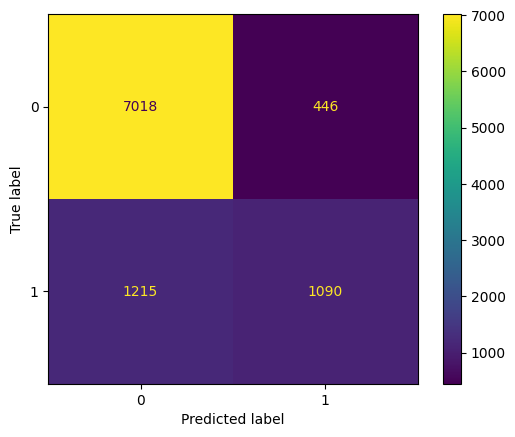

In [63]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

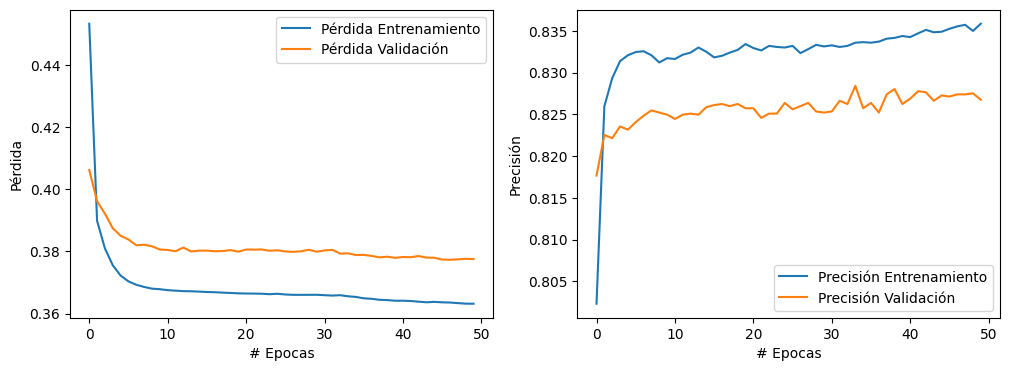

In [64]:
# Graficar la pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('# Epocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('# Epocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()